# Red Wine Quality Classification with Tensorflow and Keras

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Online database
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

In [ ]:
# Optional: Local database (directory csv)
import pandas as pd
name = 'csv/winequality-red.csv'
dataOff = pd.read_csv(url, sep=';')

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
columns = data.columns

columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# Null data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Descriptive statistics

In [9]:
data_stats = data.describe()

data_stats.pop("quality")

# Transposed Matrix
data_stats = data_stats.transpose()

data_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Functions (Transform data)

In [10]:
# Stardardization
def normStandard(x):
    return (x - data_stats['mean']) / data_stats['std']

# MinMax
def minMax(x):
    return (x - data_stats['min'])/(data_stats['max'] - data_stats['min'])

## Histogram

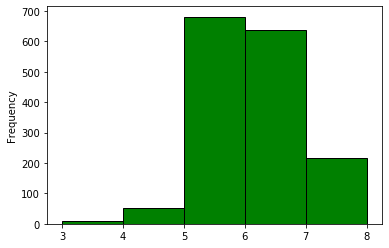

In [11]:
data['quality'].plot.hist(bins=5, color='green', edgecolor='black')

## Split the data into train and test

In [12]:
# 70% to train e 30% to test

train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

## Split features from labels

In [13]:
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

## Feature Scaling the train data

In [14]:
# Standardization is the process of putting different variables on the same scale

normed_train_data = normStandard(train_dataset)
normed_test_data = normStandard(test_dataset)

## Build Model

In [15]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(optimizer=optimizer,
              loss='mae',
              metrics=['mae', 'mse'])
    
    return model
    

In [16]:
model = build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


## Train the model

### Callbacks

In [18]:
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

callback_EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=10)

In [19]:
# You can create your callbacks functions 

class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 0.05):
            print("\nReached 0.05 mse so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

### Training

In [20]:
EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, verbose=1, callbacks=[callback_EarlyStop])

Train on 1119 samples
Epoch 1/1000
1119/1119 [==============================] - 0s 382us/sample - loss: 2.9786 - mae: 2.9786 - mse: 11.4364
Epoch 2/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 1.3015 - mae: 1.3015 - mse: 2.9679
Epoch 3/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 1.0975 - mae: 1.0975 - mse: 2.1023
Epoch 4/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.9739 - mae: 0.9739 - mse: 1.6349
Epoch 5/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.8858 - mae: 0.8858 - mse: 1.3513
Epoch 6/1000
1119/1119 [==============================] - 0s 31us/sample - loss: 0.8058 - mae: 0.8058 - mse: 1.1244
Epoch 7/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.7468 - mae: 0.7468 - mse: 0.9760
Epoch 8/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.6956 - mae: 0.6956 - mse: 0.8547
Epoch 9/1000
1119/1119 [========================

1119/1119 [==============================] - 0s 32us/sample - loss: 0.3920 - mae: 0.3920 - mse: 0.2958
Epoch 71/1000
1119/1119 [==============================] - 0s 34us/sample - loss: 0.3777 - mae: 0.3777 - mse: 0.2799
Epoch 72/1000
1119/1119 [==============================] - 0s 37us/sample - loss: 0.3764 - mae: 0.3764 - mse: 0.2824
Epoch 73/1000
1119/1119 [==============================] - 0s 34us/sample - loss: 0.3764 - mae: 0.3764 - mse: 0.2877
Epoch 74/1000
1119/1119 [==============================] - 0s 32us/sample - loss: 0.3783 - mae: 0.3783 - mse: 0.2823
Epoch 75/1000
1119/1119 [==============================] - 0s 35us/sample - loss: 0.3675 - mae: 0.3675 - mse: 0.2691
Epoch 76/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.3740 - mae: 0.3740 - mse: 0.2793
Epoch 77/1000
1119/1119 [==============================] - 0s 33us/sample - loss: 0.3771 - mae: 0.3771 - mse: 0.2801
Epoch 78/1000
1119/1119 [==============================] - 0s 32us/sample - lo

## History

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
102,0.350013,0.350013,0.253853,102
103,0.347801,0.347801,0.250776,103
104,0.345043,0.345043,0.240884,104
105,0.349831,0.349831,0.246738,105
106,0.346949,0.346949,0.244992,106


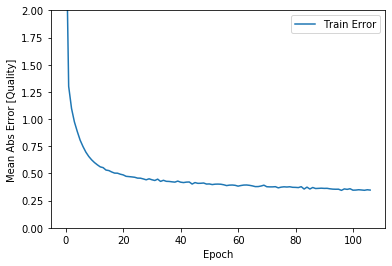

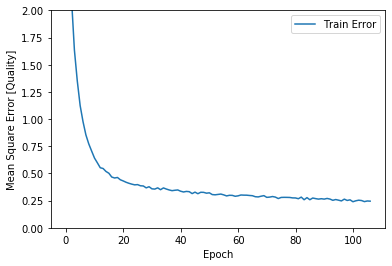

In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Quality]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.ylim([0,2])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Quality]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.ylim([0,2])
    plt.legend()
    plt.show()


plot_history(history)

## Test Data

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} Quality".format(mae))

480/480 - 0s - loss: 0.4854 - mae: 0.4854 - mse: 0.4349
Testing set Mean Abs Error:  0.49 Quality


## Make Predictions

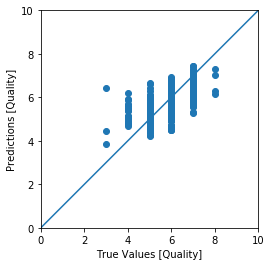

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Quality]')
plt.ylabel('Predictions [Quality]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Error Predictions

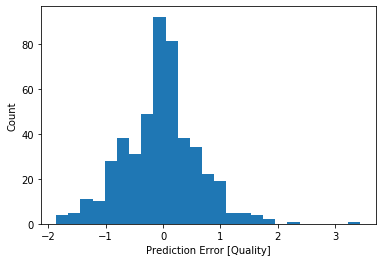

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Quality]")
_ = plt.ylabel("Count")